In [2]:
import pandas as pd
import numpy as np

### Resultados del formulario realizado en http://goo.gl/forms/R35vTqouuR

In [3]:
primer_meetup = pd.read_csv('responses.csv')
df_sin_nombres = primer_meetup.drop(['Nombre y Apellido', 'Querés dar una charla, armar un sprint?', 'Que formato se prefiere?'], 1)

In [7]:
df_sin_nombres.head()

,Timestamp,Qué temas tenés interés en ver en el segundo meetup?,Qué otros temas te interesarían?,Cuál es el nivel que desearías en el segundo meetup?,Conveniencia de horarios para meetups en general
0,6/15/2015 23:48:37,"Juegos en Python, Flask, Sensores 3D, Internet...",CNN con python,Intermedio,Sábados o domingos (cualquier horario)
1,6/16/2015 14:21:14,"Juegos en Python, Procesamiento de Imágenes Op...","Python Científico, procesamiento de imágen",Intermedio,Lunes a viernes por la tarde/noche
2,6/16/2015 15:55:54,"Data Analysis con Python, Processing con Pytho...",Visualización de datos con variable temporal (...,Avanzado,Lunes a viernes por la tarde/noche
3,6/16/2015 18:49:56,"Django, Sensores 3D, Extendiendo IPython noteb...",Uso de matplotlib para renderizar mallas 3D,Intermedio,"Lunes a viernes por la tarde/noche, Sábados o ..."
4,6/17/2015 14:17:36,Web semántica con Python,Introducción a Ipython Notebook. (O Ipython en...,Intermedio,Sábados o domingos (cualquier horario)


### Disponibilidad de fechas para primera meetup

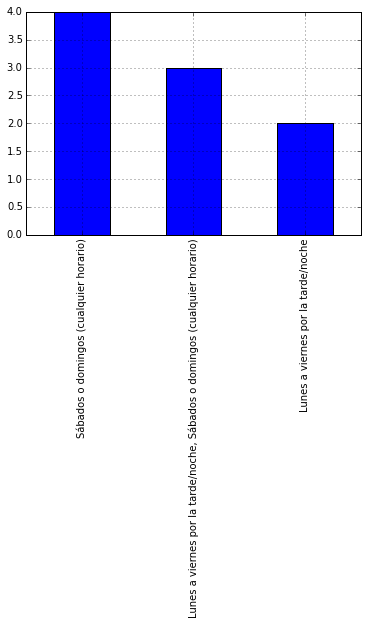

In [11]:
% matplotlib inline
df_sin_nombres[df_sin_nombres.columns[-1]].value_counts().plot(kind='bar')

### Los temas más votados para la primera meetup

In [4]:
topics = df_sin_nombres[df_sin_nombres.columns[1]].str.split(',').apply(pd.Series, 1).stack().values

In [5]:
from collections import Counter

c = Counter([i for i in topics])
topics_unique = np.unique(topics)
#print map(lambda t: c[t], topics_unique)
to_df =  c.most_common(5)
top_5_topics = pd.DataFrame([x[1:] for x in to_df], index=[x[0] for x in to_df], columns=['count'])
top_5_topics

,count
GPGPU con PyOpenCL,3
Extendiendo IPython notebook,3
Sensores 3D,3
Distribución de software desarrollado en Python,3
Domótica con Python,3


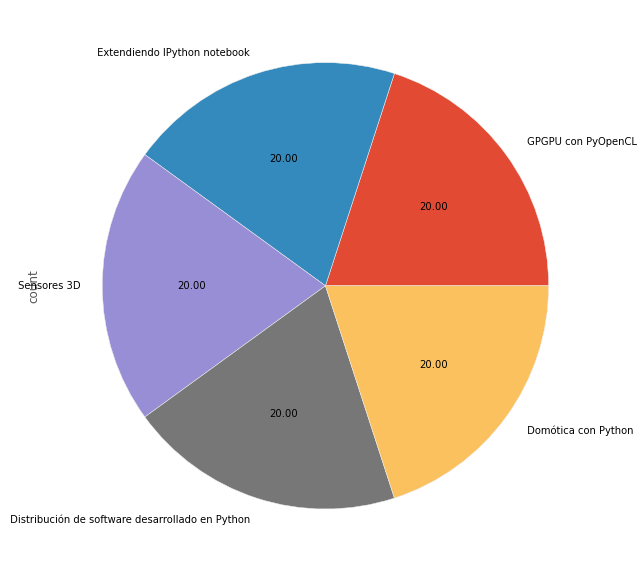

In [6]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

top_5_topics['count'].plot(kind='pie', autopct='%.2f', figsize=(10, 10))

### Nivel en el que se darán los temas ...

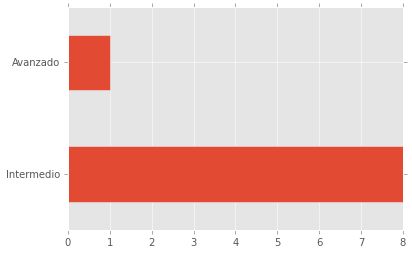

In [7]:
df_sin_nombres[df_sin_nombres.columns[-2]].value_counts().plot(kind='barh')